In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# **Feature Selection**

* To train an optimal model, we need to make sure that we use only the essential features. If we have too many features, the model can capture the unimportant patterns and learn from noise.
* The method of choosing the important parameters of our data is called Feature Selection.

Feature selection is a process that chooses a subset of features from the original features so that the feature space is optimally reduced according to a certain criterion.

To train a model, we collect enormous quantities of data to help the machine learn better. Usually, a good portion of the data collected is noise, while some of the columns of our dataset might **not contribute significantly** to the performance of our model. Further,

having a lot of data can slow down the training process and cause the model to be slower. The model may also learn from this irrelevant data and be inaccurate.

* Feature selection is a critical aspect of machine learning that involves choosing the most relevant features from a dataset. It plays a significant role in improving model performance, reducing overfitting, and enhancing interpretability

* The goal of feature selection is to improve the performance of a machine learning model by reducing the dimensionality of the input data and removing irrelevant or redundant features.

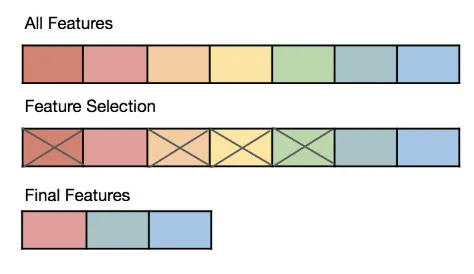

> **Example :**

Consider a table which contains information on old cars. The model decides which cars must be crushed for spare parts.  

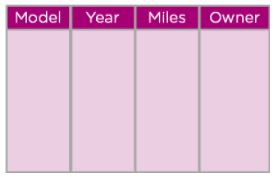


In the above table, we can see that the model of the car, the year of manufacture, and the miles it has traveled are pretty important to find out if the car is old enough to be crushed or not. However, the name of the previous owner of the car does not decide if the car should be crushed or not. Further, it can confuse the algorithm into finding patterns between names and the other features. Hence we can drop the column.     



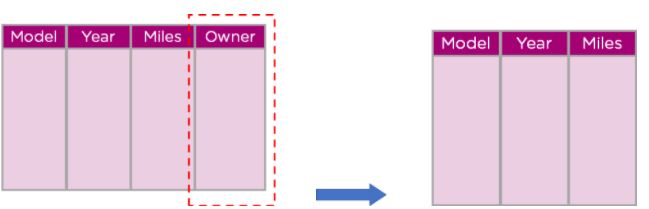

###  **What is Feature Selection?**



* Feature Selection is the method of reducing the input variable to your model by using only relevant data and getting rid of noise in data.

* It is the process of automatically choosing relevant features for your machine learning model based on the type of problem you are trying to solve. We do this by including or excluding important features without changing them. It helps in cutting down the noise in our data and reducing the size of our input data.

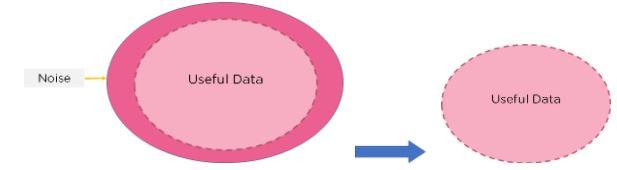

> **Feature Selection Models**

Feature selection models are of two types:

* **Supervised Models:**

  These techniques can be used for labeled data and to identify the relevant features for increasing the efficiency of supervised models like classification and regression. For Example- linear regression, decision tree, SVM, etc.


* **Unsupervised Models:**

  These techniques can be used for unlabeled data. For Example- K-Means Clustering, Principal Component Analysis, Hierarchical Clustering, etc.

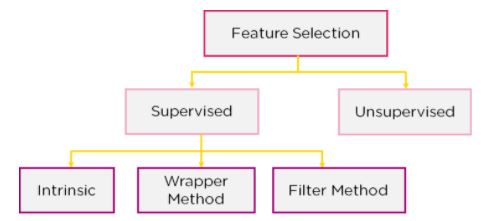

### **Types of Feature Selection Methods**

We can further divide the supervised models into three :

* Filter methods
* Wrapper methods
* Embedded methods

#### Difference between Filter, Wrapper, and Embedded Methods for Feature Selection

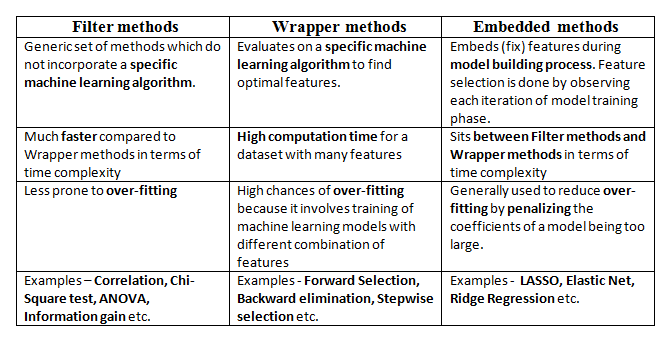

## **Filter Methods**

In this method, features are dropped based on their relation to the output, or how they are **correlating** to the output. We use **correlation** to check if the features are positively or negatively correlated to the output labels and drop features accordingly

* hese methods are faster and less computationally expensive than wrapper methods.

* When dealing with high-dimensional data, it is computationally cheaper to use filter methods.
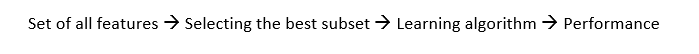

### Diffrent types of Filter Methods

###  **Information Gain**

* It is defined as the amount of information provided by the feature for identifying the target value and measures reduction in the entropy values.

* Information gain of each attribute is calculated considering the target values for feature selection.


In [ ]:
dataframe = sns.load_dataset('titanic')

dataframe.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [ ]:
# find all categorical columns
cat_cols = [ features for features in dataframe.columns if dataframe[features].dtype == 'O' ]
cat_cols

['sex', 'embarked', 'who', 'embark_town', 'alive']

In [ ]:
dataframe[cat_cols].describe()
# all columns have  less then 5 unique labels so we can use one hot

,sex,embarked,who,embark_town,alive
count,891,889,891,889,891
unique,2,3,3,3,2
top,male,S,man,Southampton,no
freq,577,644,537,644,549


In [ ]:
# encode all categorical values
from sklearn.preprocessing import OneHotEncoder
encode = OneHotEncoder(sparse_output=False)
values = encode.fit_transform(dataframe[cat_cols])

encode_cols = encode.get_feature_names_out()

encoded_df = pd.DataFrame(values,columns=encode_cols)
encoded_df.head(2)


,sex_female,sex_male,embarked_C,embarked_Q,embarked_S,embarked_nan,who_child,who_man,who_woman,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton,embark_town_nan,alive_no,alive_yes
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
# add it to the dataframe
new_data = pd.concat([dataframe,encoded_df],axis=1)
new_data.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,...,embarked_nan,who_child,who_man,who_woman,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton,embark_town_nan,alive_no,alive_yes
0,0,3,male,22.0,1,0,7.2500,S,Third,man,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   survived                 891 non-null    int64   
 1   pclass                   891 non-null    int64   
 2   sex                      891 non-null    object  
 3   age                      714 non-null    float64 
 4   sibsp                    891 non-null    int64   
 5   parch                    891 non-null    int64   
 6   fare                     891 non-null    float64 
 7   embarked                 889 non-null    object  
 8   class                    891 non-null    category
 9   who                      891 non-null    object  
 10  adult_male               891 non-null    bool    
 11  deck                     203 non-null    category
 12  embark_town              889 non-null    object  
 13  alive                    891 non-null    object  
 14  alone     

In [ ]:
new_data.dropna()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,...,embarked_nan,who_child,who_man,who_woman,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton,embark_town_nan,alive_no,alive_yes
1,1,1,female,38.0,1,0,71.2833,C,First,woman,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
6,0,1,male,54.0,0,0,51.8625,S,First,man,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
10,1,3,female,4.0,1,1,16.7000,S,Third,child,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
11,1,1,female,58.0,0,0,26.5500,S,First,woman,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,1,1,female,47.0,1,1,52.5542,S,First,woman,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
872,0,1,male,33.0,0,0,5.0000,S,First,man,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
879,1,1,female,56.0,0,1,83.1583,C,First,woman,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
887,1,1,female,19.0,0,0,30.0000,S,First,woman,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [ ]:
# remove categorical columns
new_data.drop(cat_cols,axis=1,inplace=True)


In [ ]:
new_data.dropna(inplace=True)

In [ ]:
new_data.isnull().sum()

,0
survived,0
pclass,0
age,0
sibsp,0
parch,0
fare,0
class,0
adult_male,0
deck,0
alone,0


In [ ]:
new_data.head(2)

,survived,pclass,age,sibsp,parch,fare,class,adult_male,deck,alone,...,embarked_nan,who_child,who_man,who_woman,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton,embark_town_nan,alive_no,alive_yes
1,1,1,38.0,1,0,71.2833,First,False,C,False,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
3,1,1,35.0,1,0,53.1000,First,False,C,False,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [ ]:
encode_cols

array(['sex_female', 'sex_male', 'embarked_C', 'embarked_Q', 'embarked_S',
       'embarked_nan', 'who_child', 'who_man', 'who_woman',
       'embark_town_Cherbourg', 'embark_town_Queenstown',
       'embark_town_Southampton', 'embark_town_nan', 'alive_no',
       'alive_yes'], dtype=object)

In [ ]:
# Drop NAN encoded features
new_data.drop(['embarked_nan','embark_town_nan'],axis=1,inplace=True)

In [ ]:
new_data.columns

Index(['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare', 'class',
       'adult_male', 'deck', 'alone', 'sex_female', 'sex_male', 'embarked_C',
       'embarked_Q', 'embarked_S', 'who_child', 'who_man', 'who_woman',
       'embark_town_Cherbourg', 'embark_town_Queenstown',
       'embark_town_Southampton', 'alive_no', 'alive_yes'],
      dtype='object')

In [ ]:
X = new_data[['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare', 'class',
       'adult_male', 'deck', 'alone', 'sex_female', 'sex_male', 'embarked_C',
       'embarked_Q', 'embarked_S', 'who_child', 'who_man', 'who_woman',
       'embark_town_Cherbourg', 'embark_town_Queenstown',
       'embark_town_Southampton' ]]

Y = new_data[['alive_no', 'alive_yes']]

In [ ]:
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
%matplotlib inline



importances = mutual_info_classif(X, Y)

feat_importances = pd.Series(importances, new_data.columns[0:len(new_data.columns)-1])

feat_importances.plot(kind='barh', color = 'teal')
plt.show()


ValueError: Cannot cast object dtype to float64

In [ ]:
cat = dataframe.select_dtypes(include=['category',]).columns.to_list()
cat

['class', 'deck']

In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
df = encoder.fit_transform(new_data[cat])
cols = encoder.get_feature_names_out()
df = pd.DataFrame(df,columns=cols)
df.head()

,class_First,class_Second,class_Third,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   class_First   184 non-null    float64
 1   class_Second  184 non-null    float64
 2   class_Third   184 non-null    float64
 3   deck_A        184 non-null    float64
 4   deck_B        184 non-null    float64
 5   deck_C        184 non-null    float64
 6   deck_D        184 non-null    float64
 7   deck_E        184 non-null    float64
 8   deck_F        184 non-null    float64
 9   deck_G        184 non-null    float64
dtypes: float64(10)
memory usage: 14.5 KB


In [ ]:
pd.concat([new_data,df],axis=1)

,survived,pclass,age,sibsp,parch,fare,class,adult_male,deck,alone,...,class_First,class_Second,class_Third,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G
1,1.0,1.0,38.0,1.0,0.0,71.2833,First,False,C,False,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,1.0,35.0,1.0,0.0,53.1000,First,False,C,False,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,0.0,1.0,54.0,0.0,0.0,51.8625,First,True,E,True,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
10,1.0,3.0,4.0,1.0,1.0,16.7000,Third,False,G,False,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
11,1.0,1.0,58.0,0.0,0.0,26.5500,First,False,C,True,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
179,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
181,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
new_data.index

Index([  1,   3,   6,  10,  11,  21,  23,  27,  52,  54,
       ...
       835, 853, 857, 862, 867, 871, 872, 879, 887, 889],
      dtype='int64', length=184)

In [ ]:
# the above proble happens because of the index
# new df index was diffrent  so change the new df iundex
df.set_index(new_data.index,inplace=True)

In [ ]:
# now concat
new_df = pd.concat([new_data,df],axis=1)
new_df

,survived,pclass,age,sibsp,parch,fare,class,adult_male,deck,alone,...,class_First,class_Second,class_Third,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G
1,1,1,38.0,1,0,71.2833,First,False,C,False,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1,1,35.0,1,0,53.1000,First,False,C,False,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6,0,1,54.0,0,0,51.8625,First,True,E,True,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
10,1,3,4.0,1,1,16.7000,Third,False,G,False,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11,1,1,58.0,0,0,26.5500,First,False,C,True,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,1,1,47.0,1,1,52.5542,First,False,D,False,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
872,0,1,33.0,0,0,5.0000,First,True,B,True,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
879,1,1,56.0,0,1,83.1583,First,False,C,False,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
887,1,1,19.0,0,0,30.0000,First,False,B,True,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# remove the cat feature
new_df.drop(cat,axis=1,inplace=True)

In [ ]:
new_df.isnull().sum()

,0
survived,0
pclass,0
age,0
sibsp,0
parch,0
fare,0
adult_male,0
alone,0
sex_female,0
sex_male,0


In [ ]:
new_df.columns

Index(['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare', 'adult_male',
       'alone', 'sex_female', 'sex_male', 'embarked_C', 'embarked_Q',
       'embarked_S', 'who_child', 'who_man', 'who_woman',
       'embark_town_Cherbourg', 'embark_town_Queenstown',
       'embark_town_Southampton', 'alive_no', 'alive_yes', 'class_First',
       'class_Second', 'class_Third', 'deck_A', 'deck_B', 'deck_C', 'deck_D',
       'deck_E', 'deck_F', 'deck_G'],
      dtype='object')

In [ ]:
new_df.drop([1,3],inplace=True)

In [ ]:
# before going to feature selection remove the alive features because theat is our target feature
new_df.drop(['alive_no', 'alive_yes',],axis=1,inplace=True)

In [ ]:
# create Taget Variable
data = dataframe.dropna()
data = data['alive']

In [ ]:
# encode the Trget output
from  sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoded_ = encoder.fit_transform(data)

endoed_ = pd.Series(encoded_,name='Alive')
endoed_


,Alive
0,1
1,1
2,0
3,1
4,1
...,...
177,1
178,0
179,1
180,1


In [ ]:
new_df.columns

Index(['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare', 'adult_male',
       'alone', 'sex_female', 'sex_male', 'embarked_C', 'embarked_Q',
       'embarked_S', 'who_child', 'who_man', 'who_woman',
       'embark_town_Cherbourg', 'embark_town_Queenstown',
       'embark_town_Southampton', 'class_First', 'class_Second', 'class_Third',
       'deck_A', 'deck_B', 'deck_C', 'deck_D', 'deck_E', 'deck_F', 'deck_G'],
      dtype='object')

In [ ]:
X = new_df[['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare', 'adult_male',
       'alone', 'sex_female', 'sex_male', 'embarked_C', 'embarked_Q',
       'embarked_S', 'who_child', 'who_man', 'who_woman',
       'embark_town_Cherbourg', 'embark_town_Queenstown',
       'embark_town_Southampton', 'class_First', 'class_Second', 'class_Third',
       'deck_A', 'deck_B', 'deck_C', 'deck_D', 'deck_E', 'deck_F', 'deck_G']]


Y = endoed_

In [ ]:
X.shape

(182, 29)

In [ ]:
Y.shape

(182,)

Thre are two types  in information
if the target is a discreate means(particula set of variables)
* suppose the above target(alive) is  desicreate have only (0,1)
* classification:
  * if the if the problem is a classification problem the we use **mutual_info_classif**

* regression:
  * if the probelm is a regession prblem(means target is continueus number) then we use **mutual_info__regrssion**

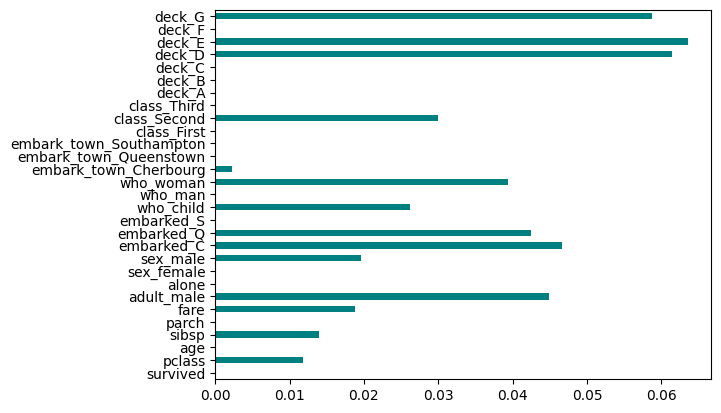

In [ ]:
#  using mutual_info_classif ------------because its a classification
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
%matplotlib inline

importences = mutual_info_classif(X,Y)
feature_importences = pd.Series(importences,index=new_df.columns[0:len(new_df.columns)])

feature_importences.plot(kind='barh', color = 'teal')
plt.show()


In [ ]:
importences
# thrase are value of impact on target variable means which column have high impact we use both columns only

# in this below array we get zero and may get positive value zero mean there is no impact beacuse of the freatue in target
# positive value represent how much impact a feature have with respect to target

array([0.        , 0.02043942, 0.        , 0.05611027, 0.00310275,
       0.00211349, 0.02220929, 0.        , 0.00215648, 0.        ,
       0.01223154, 0.01539063, 0.        , 0.        , 0.02957166,
       0.03122848, 0.        , 0.03542923, 0.03026363, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.02857216, 0.00369639, 0.        ])

In [ ]:
# here first we order the above values
feature_importence = pd.Series(importences,index=new_df.columns)
feature_importence.sort_values(ascending=False)

,0
sibsp,0.056110
embark_town_Queenstown,0.035429
who_woman,0.031228
embark_town_Southampton,0.030264
who_man,0.029572
deck_E,0.028572
adult_male,0.022209
pclass,0.020439
embarked_Q,0.015391
embarked_C,0.012232


<Axes: >

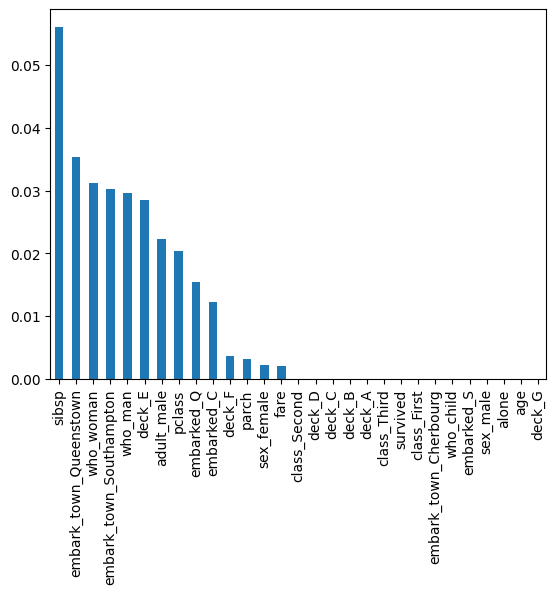

In [ ]:
feature_importence.sort_values(ascending=False).plot(kind='bar')
# knowing the importence visually

In [ ]:
# heare we are using kbest to take top 14 impactr feature # how many feature will tKke
# it will decide by deomain expert or some one
from sklearn.feature_selection import SelectKBest
kbest = SelectKBest(mutual_info_classif,k=14) # kbest using  ---------> mutual_info_classif
top_features = kbest.fit(X,Y)
kbest.get_support()

array([False,  True, False,  True, False,  True,  True,  True, False,
       False,  True, False, False,  True, False, False, False, False,
        True,  True, False, False,  True,  True,  True, False,  True,
       False,  True])

In [ ]:
# finding the best columns
new_df.columns[kbest.get_support()]


Index(['pclass', 'sibsp', 'fare', 'adult_male', 'alone', 'embarked_C',
       'who_child', 'embark_town_Southampton', 'class_First', 'deck_A',
       'deck_B', 'deck_C', 'deck_E', 'deck_G'],
      dtype='object')

In [ ]:
# thease are the best 14 features for model building
# we can use these columns for model building

### **2. Chi-square test**

The Chi-square test is used for categorical features in a dataset.

We calculate Chi-square between each feature and the target and select the desired number of features with the best Chi-square scores.
*  In order to correctly apply the chi-squared to test the relation between various features in the dataset
*  the target variable, the following conditions have to be met:
  * the variables have to be categorical,
  * sampled independently,  
  * values should have an expected frequency greater than 5.

  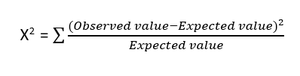

In [ ]:
X.head(2)

,survived,pclass,age,sibsp,parch,fare,adult_male,alone,sex_female,sex_male,...,class_First,class_Second,class_Third,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G
6,0,1,54.0,0,0,51.8625,True,True,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
10,1,3,4.0,1,1,16.7000,False,False,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
Y.head(2)

,Alive
0,1
1,1


In [ ]:
from sklearn.feature_selection import SelectKBest,chi2

chi_features = SelectKBest(chi2,k=15)
X_best_features = chi_features.fit_transform(X,Y)

print('Original feature number:', new_df.shape[1])
print('Reduced feature number:', X_best_features.shape[1])


Original feature number: 29
Reduced feature number: 15


In [ ]:
X_best_features

array([[ 0., 54.,  0., ...,  1.,  0.,  0.],
       [ 1.,  4.,  1., ...,  0.,  0.,  1.],
       [ 1., 58.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 1., 56.,  0., ...,  0.,  0.,  0.],
       [ 1., 19.,  0., ...,  0.,  0.,  0.],
       [ 1., 26.,  0., ...,  0.,  0.,  0.]])

In [ ]:
chi_features.get_feature_names_out()

array(['survived', 'age', 'sibsp', 'parch', 'fare', 'embarked_Q',
       'who_child', 'embark_town_Queenstown', 'class_Second',
       'class_Third', 'deck_A', 'deck_B', 'deck_E', 'deck_F', 'deck_G'],
      dtype=object)

In [ ]:
best_features = pd.DataFrame(X_best_features,columns=chi_features.get_feature_names_out())
best_features.head(2)

,survived,age,sibsp,parch,fare,embarked_Q,who_child,embark_town_Queenstown,class_Second,class_Third,deck_A,deck_B,deck_E,deck_F,deck_G
0,0.0,54.0,0.0,0.0,51.8625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,4.0,1.0,1.0,16.7000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


###  **3. Fisher’s Score**

Fisher’s Score selects each feature independently according to their scores under Fisher criterion leading to a suboptimal set of features. The larger the Fisher’s score is, the better is the selected feature.

* Fisher score is one of the most widely used supervised feature selection methods.
* The algorithm we will use returns the ranks of the variables based on the fisher’s score in descending order.
* We can then select the variables as per the case.

### **4. Correlation Coefficient**

 – Pearson’s Correlation Coefficient is a measure of quantifying the association between the two continuous variables and the direction of the relationship with its values ranging from -1 to 1.

* Correlation is a measure of the linear relationship between 2 or more variables. Through correlation, we can predict one variable from the other. The logic behind using correlation for feature selection is that good variables correlate highly with the target. Furthermore, variables should be correlated with the target but uncorrelated among themselves.

* If two variables are correlated, we can predict one from the other. Therefore, if two features are correlated, the model only needs one, as the second does not add additional information. We will use the Pearson Correlation here.

In [ ]:
from sklearn.datasets import load_wine
data = load_wine()
df = pd.DataFrame(data.data,columns=data.feature_names)
df.head(2)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0


In [ ]:
starget = pd.Series(data.target,name='target')
target.head(2)

,target
0,0
1,0


In [ ]:
# train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df,target,train_size=0.7,test_size=0.3,random_state=0)
# why we use train test split ----------------to avoid (or) overcome overfitting

In [ ]:
x_train.shape

(124, 13)

In [ ]:
x_test.shape

(54, 13)

In [ ]:
cor = x_train.corr()
cor

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
alcohol,1.000000,0.087268,0.228809,-0.326030,0.212436,0.352899,0.296712,-0.167773,0.095713,0.565029,-0.047430,0.073438,0.627676
malic_acid,0.087268,1.000000,0.200015,0.304109,-0.059823,-0.298813,-0.408887,0.363213,-0.190354,0.305012,-0.545493,-0.390354,-0.200906
ash,0.228809,0.200015,1.000000,0.446093,0.181737,0.121369,0.060808,0.185052,-0.025868,0.243573,-0.108399,-0.018053,0.158194
alcalinity_of_ash,-0.326030,0.304109,0.446093,1.000000,-0.088590,-0.367199,-0.414673,0.398878,-0.255579,-0.030653,-0.251091,-0.287010,-0.481131
magnesium,0.212436,-0.059823,0.181737,-0.088590,1.000000,0.163801,0.143421,-0.305155,0.270090,0.125051,0.057459,0.015833,0.312073
total_phenols,0.352899,-0.298813,0.121369,-0.367199,0.163801,1.000000,0.874093,-0.450308,0.614683,-0.068791,0.453501,0.716321,0.558725
flavanoids,0.296712,-0.408887,0.060808,-0.414673,0.143421,0.874093,1.000000,-0.578595,0.660619,-0.190290,0.578615,0.795590,0.553097
nonflavanoid_phenols,-0.167773,0.363213,0.185052,0.398878,-0.305155,-0.450308,-0.578595,1.000000,-0.351086,0.153267,-0.315259,-0.489811,-0.361626
proanthocyanins,0.095713,-0.190354,-0.025868,-0.255579,0.270090,0.614683,0.660619,-0.351086,1.000000,-0.069615,0.320218,0.506250,0.352654
color_intensity,0.565029,0.305012,0.243573,-0.030653,0.125051,-0.068791,-0.190290,0.153267,-0.069615,1.000000,-0.519728,-0.448015,0.313506


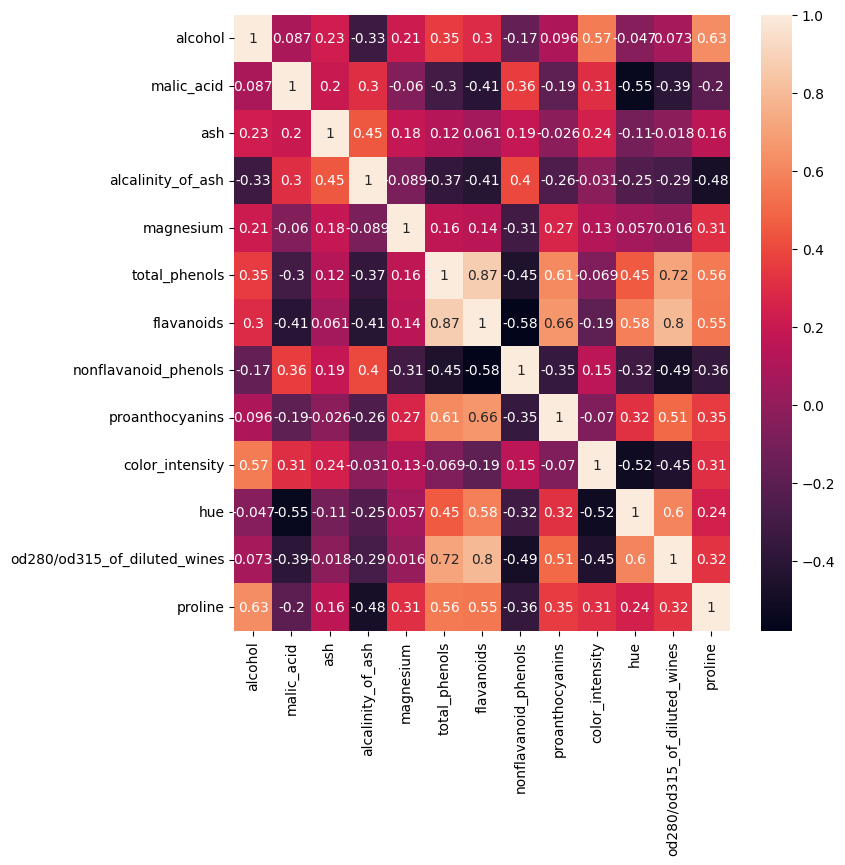

In [ ]:
cor = x_train.corr()
plt.figure(figsize=(8,8))
sns.heatmap(cor,annot=True)

plt.show()

In [ ]:
# lets filter the data based on correlation


In [ ]:
# our aim is if anytwo column have a  highly corrletion then both contrubutes the ssame to the model
# in this case we can remove any one of the column from the data because both are highly correlated

In [ ]:
# with this funcyion we can select highly correlated function
# it will remove the first feature i.e correlated with anything other feature
def find_correlation(dataset,threshold):
  corr_col = list()
  corr_matrix= dataset.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if corr_matrix.iloc[i,j]> threshold: # If we are intrested in absolute correlation coefficent then we can also add ABS()
        col_name = corr_matrix.columns[i]
        corr_col.append(col_name)
  return corr_col

In [ ]:

find_correlation(x_train,0.8)

['flavanoids']

In [ ]:
# this is the feature we can remove from the data based on correlation facetor

### **5. Variance Threshold**

It is an approach where all features are removed whose variance doesn’t meet the specific threshold. By default, this method removes features having zero variance.

* We assume that features with a higher variance may contain more useful information,
* but note that we are not taking the relationship between feature variables or feature and target variables into account,
* which is one of the drawbacks of filter methods.

In [ ]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data,columns=diabetes.feature_names)
df.head()


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [ ]:
diabetes.target

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [ ]:

target = pd.Series(diabetes.target,name='Target')


In [ ]:
# train test Split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df,target,test_size=0.3,train_size=0.7,random_state=0)

In [ ]:
X = x_train
Y = y_train

In [ ]:

from sklearn.feature_selection import VarianceThreshold
thresh = VarianceThreshold(threshold=0)
fitted = thresh.fit_transform(X,Y)


In [ ]:
thresh.get_feature_names_out()

array(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'],
      dtype=object)

In [ ]:
thresh.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

##### **with diffrent data to understand Actual working**

In [ ]:
a = {
    "A" : [1,2,3,4,5,6],
    "B" : [1,1,1,1,1,1],# col with no varience
    "C" : [1,3,4,5,6,7],
    "D" : [0,0,0,0,0,0] # col with no varience
}

In [ ]:
data = pd.DataFrame(a)
data

,A,B,C,D
0,1,1,1,0
1,2,1,3,0
2,3,1,4,0
3,4,1,5,0
4,5,1,6,0
5,6,1,7,0


In [ ]:
from sklearn.feature_selection import VarianceThreshold

thresh = VarianceThreshold()
fitted = thresh.fit_transform(data)
thresh.get_support()

array([ True, False,  True, False])

In [ ]:
data.columns[thresh.get_support()]

Index(['A', 'C'], dtype='object')

In [ ]:
remove_cols = [column for column in data.columns
               if column in data.columns[thresh.get_support()]]

remove_cols

['A', 'C']

In [ ]:
data.drop(remove_cols,axis=1,inplace=True)

In [ ]:
data

,B,D
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
5,1,0


### **6. Mean Absolute Difference (MAD)**

 * This method is similar to variance threshold method but the difference is there is no square in MAD.
 * This method calculates the mean absolute difference from the mean value.

In [ ]:
from sklearn.datasets import load_wine

data = load_wine()
df = pd.DataFrame(data.data,columns=[data.feature_names])
df.head(2)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0


In [ ]:
target = pd.Series(data.target,name='Wine')


In [ ]:
# train test split
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test =  train_test_split(df,target,test_size=0.3,random_state=25)

In [ ]:
np.mean(x_train,axis=0)

,0
alcohol,13.055726
malic_acid,2.324516
ash,2.375081
alcalinity_of_ash,19.608871
magnesium,99.201613
total_phenols,2.296532
flavanoids,2.000484
nonflavanoid_phenols,0.366935
proanthocyanins,1.579194
color_intensity,5.189677


In [ ]:
np.abs(x_train-np.mean(x_train,axis=0))

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
157,0.605726,0.705484,0.264919,7.391129,2.201613,0.396532,1.420484,0.263065,0.439194,2.310323,0.287419,0.859597,127.879032
100,0.975726,0.244516,0.675081,2.108871,2.201613,0.066532,0.169516,0.106935,0.179194,1.889677,0.312581,0.370403,42.120968
149,0.024274,1.575484,0.015081,1.891129,13.798387,0.886532,0.610484,0.026935,0.439194,4.210323,0.387419,1.259597,202.120968
35,0.424274,0.514516,0.034919,0.891129,0.798387,0.403468,0.979516,0.106935,0.280806,0.089677,0.082581,0.880403,167.879032
91,1.055726,0.814516,0.044919,2.391129,13.201613,0.846532,0.750484,0.133065,0.050806,1.589677,0.092581,0.060403,302.120968
...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,0.285726,1.105484,0.395081,3.608871,19.201613,0.666532,0.750484,0.063065,0.749194,1.789677,0.257419,0.469597,380.120968
61,0.415726,0.964516,0.355081,2.808871,0.798387,0.276532,0.590484,0.163065,0.959194,0.560323,0.022581,0.999597,302.120968
143,0.564274,2.625484,0.025081,0.391129,7.201613,0.296532,1.200484,0.103065,0.559194,0.789677,0.047419,0.539597,202.120968
62,0.614274,1.074516,0.455081,1.608871,5.201613,0.196532,0.210484,0.046935,0.849194,1.389677,0.272581,0.129597,122.120968


In [ ]:
np.sum(np.abs(x_train-np.mean(x_train,axis=0)),axis=0)

,0
alcohol,82.661452
malic_acid,113.544516
ash,26.169677
alcalinity_of_ash,339.370968
magnesium,1358.225806
total_phenols,67.469194
flavanoids,106.475161
nonflavanoid_phenols,13.375484
proanthocyanins,55.236774
color_intensity,230.535483


In [ ]:
x_train.shape[0]

124

In [ ]:
# mad (Mean Absolut Function)
mean_abs_diff = np.sum(np.abs(x_train-np.mean(x_train,axis=0)),axis=0)/x_train.shape[0]
mean_abs_diff

,0
alcohol,0.666625
malic_acid,0.915682
ash,0.211046
alcalinity_of_ash,2.736863
magnesium,10.953434
total_phenols,0.544106
flavanoids,0.858671
nonflavanoid_phenols,0.107867
proanthocyanins,0.445458
color_intensity,1.859157


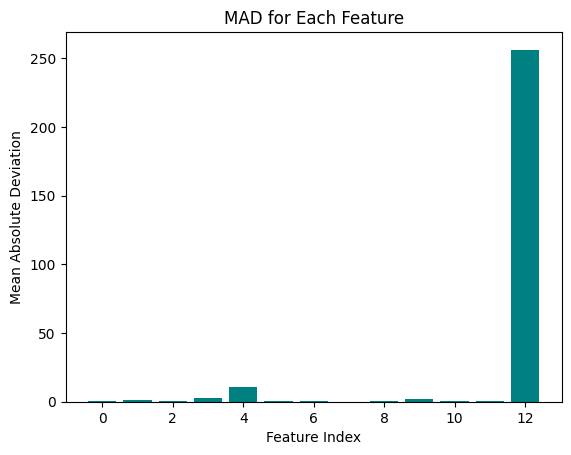

In [ ]:
plt.bar(np.arange(x_train.shape[1]),mean_abs_diff,color='teal')
plt.xlabel("Feature Index")
plt.ylabel("Mean Absolute Deviation")
plt.title("MAD for Each Feature")
plt.show()

##  **How to Choose a Feature Selection Model?**


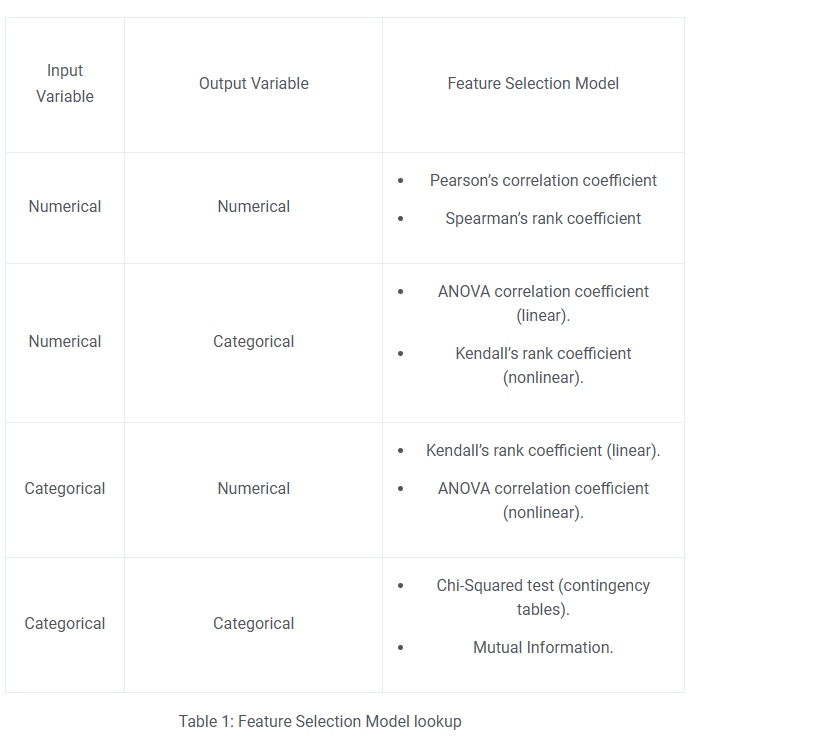

# **Wrapper methods**

Wrapper methods, also referred to as greedy algorithms train the algorithm by using a subset of features in an iterative manner. Based on the conclusions made from training in prior to the model, addition and removal of features takes place. Stopping criteria for selecting the best subset are usually pre-defined by the person training the model such as when the performance of the model decreases or a specific number of features has been achieved.

* The wrapper methods usually result in better predictive accuracy than filter methods.

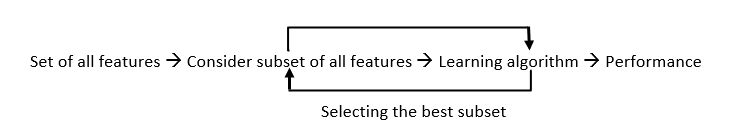

## Diffrent types of Wrapper Method

### **1. Forward selection**
* This method is an iterative approach where we initially start with an empty set of features and keep adding a feature which best improves our model after each iteration.
* The stopping criterion is till the addition of a new variable does not improve the performance of the model

>* First it  start with zero feature selct the best first feature and then add next best feature to it. and it iterate linke untill the accuracy is decrreasing then it stops or an end user can provide when the iteration is stop.

In [ ]:
# in the model we use astimator to find the best feature
# if the problem is classification we gave cassific-algo
# if it is a contineous(regressio) problem we use regression Algo


In [ ]:
# import data set
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
df = pd.DataFrame(data.data,columns=data.feature_names)
df.head(2)



,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [ ]:
df.shape

(569, 30)

In [ ]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [ ]:
# target
target = pd.Series(data.target,name='Result')

In [ ]:
# train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df,target,test_size=0.3,random_state=15)

In [ ]:
from re import VERBOSE
# feature selection
# forward selection
# estimator it is a classification proble taget only have two categories so we can use decision tree

from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.tree import DecisionTreeClassifier

selecter = SequentialFeatureSelector(DecisionTreeClassifier(), # we can also provide how many featuers can select
                                    direction='forward',
                                    cv=5,
                                    scoring='accuracy')

selecter.fit_transform(x_train,y_train)


array([[1.321e+01, 2.525e+01, 5.379e+02, ..., 9.129e+01, 1.289e-01,
        6.788e-02],
       [1.195e+01, 1.496e+01, 4.267e+02, ..., 8.309e+01, 1.293e-01,
        7.590e-02],
       [2.463e+01, 2.160e+01, 1.841e+03, ..., 2.057e+02, 1.342e-01,
        9.671e-02],
       ...,
       [1.768e+01, 2.074e+01, 9.637e+02, ..., 1.329e+02, 1.418e-01,
        7.738e-02],
       [1.328e+01, 1.372e+01, 5.418e+02, ..., 9.659e+01, 1.166e-01,
        7.320e-02],
       [1.163e+01, 2.929e+01, 4.151e+02, ..., 8.604e+01, 1.406e-01,
        7.220e-02]])

In the above code estimater will canged basec on given problem
*  suppose if it is a regression problem ex. then we use linear regression

In [ ]:
# from 30 features we got best 15 ffeatures
selecter.get_feature_names_out()

array(['mean radius', 'mean texture', 'mean area', 'mean smoothness',
       'mean fractal dimension', 'radius error', 'perimeter error',
       'area error', 'concave points error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter',
       'worst smoothness', 'worst fractal dimension'], dtype=object)

In [ ]:
# no of features
selecter.get_feature_names_out().size

15

In [ ]:
# accuracy
selecter.scoring # need to know

'accuracy'

In [ ]:
#Selected features for model creation
x_train[selecter.get_feature_names_out()].head()

,mean texture,mean area,mean smoothness,mean compactness,mean symmetry,perimeter error,area error,compactness error,concavity error,symmetry error,fractal dimension error,worst radius,worst perimeter,worst smoothness,worst fractal dimension
457,25.25,537.9,0.08791,0.05205,0.1619,1.314,17.58,0.008082,0.015100,0.01347,0.001828,14.35,91.29,0.1289,0.06788
349,14.96,426.7,0.11580,0.12060,0.2459,2.455,26.65,0.024170,0.007816,0.02734,0.003114,12.81,83.09,0.1293,0.07590
521,21.60,1841.0,0.10300,0.21060,0.1991,7.050,139.90,0.032120,0.035710,0.01879,0.004760,29.92,205.70,0.1342,0.09671
365,21.78,1293.0,0.09150,0.11310,0.1618,4.218,72.44,0.019060,0.023750,0.01445,0.001906,24.31,161.20,0.1327,0.06735
374,16.07,579.1,0.08302,0.06374,0.1872,1.372,14.00,0.015870,0.011690,0.01943,0.002177,14.84,99.16,0.1105,0.07701


### **2. Backward elimination**
*  This method is also an iterative approach where we initially start with all features and after each iteration, we remove the least significant feature.
* The stopping criterion is till no improvement in the performance of the model is observed after the feature is removed.

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.tree import DecisionTreeClassifier
selector = SequentialFeatureSelector(DecisionTreeClassifier(),
                                     direction='backward',
                                     cv=5
                                     )
selector.fit_transform(x_train,y_train)

array([[  13.21,   25.25,   84.1 , ...,   34.23,   91.29,  632.9 ],
       [  11.95,   14.96,   77.23, ...,   17.72,   83.09,  496.2 ],
       [  24.63,   21.6 ,  165.5 , ...,   26.93,  205.7 , 2642.  ],
       ...,
       [  17.68,   20.74,  117.4 , ...,   25.11,  132.9 , 1302.  ],
       [  13.28,   13.72,   85.79, ...,   17.37,   96.59,  623.7 ],
       [  11.63,   29.29,   74.87, ...,   38.81,   86.04,  527.8 ]])

In [ ]:
selector.get_feature_names_out()

array(['mean radius', 'mean texture', 'mean perimeter',
       'mean compactness', 'mean concavity', 'mean concave points',
       'mean fractal dimension', 'perimeter error', 'area error',
       'compactness error', 'concave points error', 'symmetry error',
       'worst texture', 'worst perimeter', 'worst area'], dtype=object)

In [ ]:
selector.get_feature_names_out().size

15

### **3. Bi-directional elimination**

 This method uses both forward selection and backward elimination technique simultaneously to reach one unique solution.

### **4. Exhaustive selection**

* This technique is considered as the brute force approach for the evaluation of feature subsets. It creates all possible subsets and builds a learning algorithm for each subset and selects the subset whose model’s performance is best.



* means it tries every possible combination of the variables and returns the best-performing subset.

In [ ]:
from sklearn.datasets import load_wine
data = load_wine()
df = pd.DataFrame(data.data,columns=data.feature_names)
df.head(2)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0


In [ ]:
target = pd.Series(data.target,name='Result')

In [ ]:
# train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df,target,test_size=0.3)

In [ ]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector
from mlxtend.plotting import plot_sequential_feature_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression as LGBS

selector = ExhaustiveFeatureSelector(DecisionTreeClassifier(),
                                     min_features=1,
                                     max_features=5,
                                     scoring='accuracy',
                                     cv=3)
selector.fit(x_train,y_train)

In [ ]:
selector.best_feature_names_

None


### **5. Recursive elimination**

 * This greedy optimization method selects features by recursively considering the smaller and smaller set of features.
 * The estimator is trained on an initial set of features and their importance is obtained using feature_importance_attribute.
 * The least important features are then removed from the current set of features till we are left with the required number of features.

In [ ]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
df = pd.DataFrame(data.data,columns=data.feature_names)
df.head(2)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [ ]:
target = pd.Series(data.target,name='Result')

In [ ]:
# train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df,target,test_size=0.3)

In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifiero

selector = RFECV(DecisionTreeClassifier(),
                 cv=5,
                 scoring='roc_auc')
selector.fit_transform(x_train,y_train)

array([[2.211e+01, 9.753e+01, 6.937e+02, ..., 1.308e-01, 3.163e-01,
        9.251e-02],
       [1.436e+01, 8.746e+01, 5.663e+02, ..., 1.288e-01, 2.977e-01,
        7.259e-02],
       [2.056e+01, 1.184e+02, 1.007e+03, ..., 1.489e-01, 3.251e-01,
        7.625e-02],
       ...,
       [1.402e+01, 7.424e+01, 4.273e+02, ..., 8.290e-02, 3.101e-01,
        6.688e-02],
       [2.398e+01, 1.128e+02, 8.993e+02, ..., 1.847e-01, 3.530e-01,
        8.482e-02],
       [2.187e+01, 1.821e+02, 2.250e+03, ..., 2.688e-01, 2.856e-01,
        8.082e-02]])

In [ ]:
selector.get_feature_names_out()

array(['mean texture', 'mean perimeter', 'mean area', 'mean smoothness',
       'mean compactness', 'mean concavity', 'mean concave points',
       'mean symmetry', 'mean fractal dimension', 'radius error',
       'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype=object)

In [ ]:
selector.get_feature_names_out().size

29

In [ ]:
selector.get_support().size

30

In [ ]:
selector.get_support()

array([False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

# **3. Embedded methods:**

* In embedded methods, the feature selection algorithm is blended as part of the learning algorithm, thus having its own built-in feature selection methods.
* Embedded methods encounter the drawbacks of filter and wrapper methods and merge their advantages.
* These methods are faster like those of filter methods and more accurate than the filter methods and take into consideration a combination of features as well.

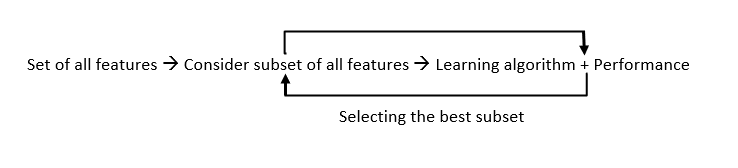

* Some Examples of Embedded Methods:

 * Regularization
 * Tree-based methods

## diffrent types of embedded methods

### **1. Regularization**

* This method adds a penalty to different parameters of the machine learning model to avoid over-fitting of the model.
* This approach of feature selection uses Lasso (L1 regularization) and Elastic nets (L1 and L2 regularization). The penalty is applied over the coefficients, thus bringing down some coefficients to zero.
*  The features having zero coefficient can be removed from the dataset.

In [ ]:
# import dataset
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

df = pd.DataFrame(data.data, columns=data.feature_names)
df.head(2)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [ ]:
target = pd.Series(data.target,name='Result')

In [ ]:
# train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df,target,test_size=0.3,random_state=11)

In [ ]:
# find the best features
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

selector = SelectFromModel(LogisticRegression(penalty='l1',C=10,solver='liblinear'))

selector.fit(x_train,y_train)



/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


SelectFromModel(estimator=LogisticRegression(C=10, penalty='l1',
                                             solver='liblinear'))

In [ ]:
selector.get_support()

array([ True,  True,  True,  True, False, False,  True, False, False,
       False, False,  True,  True,  True, False, False, False, False,
       False, False,  True,  True,  True,  True, False, False,  True,
        True,  True, False])

In [ ]:
selector.get_support().size

30

In [ ]:
selector.get_feature_names_out().size

15

In [ ]:
selector.get_feature_names_out()

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean concavity', 'texture error', 'perimeter error', 'area error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst concavity', 'worst concave points', 'worst symmetry'],
      dtype=object)

In [ ]:
# model cration
model = LogisticRegression(penalty='l1',C=10,solver='liblinear')
model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LogisticRegression(C=10, penalty='l1', solver='liblinear')

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
y_pred

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1])

In [ ]:
# accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)


0.9415204678362573

> **With L2 Regularization**

In [ ]:
# loaddata
from sklearn.datasets import load_wine
data = load_wine()

df = pd.DataFrame(data.data, columns=data.feature_names)
df.head(2)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0


In [ ]:
target = pd.Series(data.target,name='wine')

In [ ]:
#train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_tain,y_test = train_test_split(df,target,test_size=0.3,random_state=15)

In [ ]:
from sklearn.linear_model import LogisticRegression

selector = SelectFromModel(LogisticRegression(penalty='l2',C=7,solver='liblinear'))
selector.fit(x_train,y_tain)

SelectFromModel(estimator=LogisticRegression(C=7, solver='liblinear'))

In [ ]:
selector.get_feature_names_out()

array(['malic_acid', 'ash', 'flavanoids', 'proanthocyanins',
       'color_intensity', 'hue', 'od280/od315_of_diluted_wines'],
      dtype=object)

In [ ]:
selector.get_feature_names_out().size

7

In [ ]:
selector.get_support().size

13

In [ ]:
# out of 13 features we got best 7 features

In [ ]:
selector.get_support()

array([False,  True,  True, False, False, False,  True, False,  True,
        True,  True,  True, False])

In [ ]:
# create model
model = LogisticRegression(penalty='l2',C=7,solver='liblinear')
model.fit(x_train,y_tain)

LogisticRegression(C=7, solver='liblinear')

In [ ]:
pred_val = model.predict(x_test)
pred_val

array([2, 0, 2, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 2, 0, 2, 1, 2, 0,
       2, 2, 2, 0, 2, 1, 0, 1, 1, 2, 0, 1, 2, 0, 0, 1, 1, 2, 1, 1, 2, 2,
       1, 1, 2, 0, 0, 0, 0, 2, 0, 1])

In [ ]:
# Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred_val)

0.9444444444444444

### **2. Tree-based methods**

 * These methods such as Random Forest, Gradient Boosting provides us feature importance as a way to select features as well.
 * Feature importance tells us which features are more important in making an impact on the target feature.

In [ ]:
# data set
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
df = pd.DataFrame(data.data,columns=data.feature_names)
df.head(2)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [ ]:
target = pd.Series(data.target,name='Result')

In [ ]:
# train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df,target,test_size=0.3,random_state=25)

model with out feature selection

In [ ]:
# model
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=100,n_estimators=50)
model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=50, random_state=100)

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(x_test)
accuracy_score(y_test,y_pred)

0.9532163742690059

In [ ]:
# feature importence
model.feature_importances_

array([0.05458895, 0.00896359, 0.04849286, 0.03720628, 0.00618126,
       0.00578708, 0.08747282, 0.12073782, 0.00403592, 0.00365448,
       0.00307533, 0.00592907, 0.00977316, 0.02049617, 0.0036643 ,
       0.00259765, 0.00929323, 0.00959408, 0.00394542, 0.00608281,
       0.08655097, 0.01510532, 0.11425258, 0.13440312, 0.01362811,
       0.00657745, 0.06611991, 0.0971121 , 0.00866313, 0.00601502])

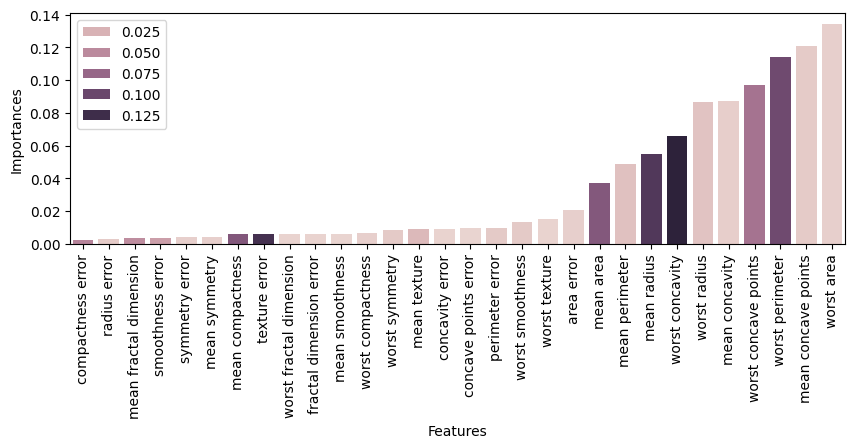

In [ ]:

importences = model.feature_importances_

imp_cols = pd.DataFrame({"Features":x_train.columns,"Importances":model.feature_importances_})
sorted = imp_cols.sort_values('Importances')
plt.figure(figsize=(10,3))
sns.barplot(data=sorted,x='Features',y='Importances',hue=importences)
plt.xticks(rotation=90)
plt.show()

now lets see the model Accuracy with feature selection

In [ ]:
from sklearn.feature_selection import SelectFromModel

selector = SelectFromModel(estimator=RandomForestClassifier(n_estimators=50,random_state=100))
selector.fit(x_train,y_train)

SelectFromModel(estimator=RandomForestClassifier(n_estimators=50,
                                                 random_state=100))

In [ ]:
selector.get_feature_names_out()

array(['mean radius', 'mean perimeter', 'mean area', 'mean concavity',
       'mean concave points', 'worst radius', 'worst perimeter',
       'worst area', 'worst concavity', 'worst concave points'],
      dtype=object)

In [ ]:
selector.get_feature_names_out().size

10

In [ ]:
x_train[selector.get_feature_names_out()].head(2)

,mean radius,mean perimeter,mean area,mean concavity,mean concave points,worst radius,worst perimeter,worst area,worst concavity,worst concave points
506,12.22,79.47,453.1,0.08175,0.02166,13.16,85.13,515.3,0.3535,0.08088
73,13.80,90.43,584.1,0.07789,0.05069,16.57,110.30,812.4,0.2779,0.13830


In [ ]:
x_test.shape

(171, 30)

In [ ]:
x_test[selector.get_feature_names_out()].head(2)

,mean radius,mean perimeter,mean area,mean concavity,mean concave points,worst radius,worst perimeter,worst area,worst concavity,worst concave points
522,11.26,71.30,388.1,0.005067,0.005664,11.93,76.38,435.9,0.02533,0.02832
120,11.41,73.34,403.3,0.035120,0.026230,12.82,83.74,510.5,0.21020,0.08958


In [ ]:
x_train = x_train[selector.get_feature_names_out()]
x_test = x_test[selector.get_feature_names_out()]

In [ ]:
# model building
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=100,n_estimators=50)
model.fit(x_train,y_train)


RandomForestClassifier(n_estimators=50, random_state=100)

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(x_test)
accuracy_score(y_test,y_pred)

0.935672514619883